**Table of contents**<a id='toc0_'></a>    
- 1. [Explorer](#toc1_)    
- 2. [采样地图](#toc2_)    
- 3. [Diversity analysis](#toc3_)    
  - 3.1. [check](#toc3_1_)    
  - 3.2. [Part](#toc3_2_)    
  - 3.3. [Area](#toc3_3_)    
  - 3.4. [Longitude](#toc3_4_)    
  - 3.5. [Latitude](#toc3_5_)    
  - 3.6. [Altitude](#toc3_6_)    
  - 3.7. [Soil](#toc3_7_)    
  - 3.8. [Soil pH](#toc3_8_)    
  - 3.9. [Breeding](#toc3_9_)    
  - 3.10. [Previous crop](#toc3_10_)    
  - 3.11. [Mode](#toc3_11_)    
  - 3.12. [Early blight](#toc3_12_)    
- 4. [多因素影响分析](#toc4_)    
  - 4.1. [OLS](#toc4_1_)    
  - 4.2. [RDA](#toc4_2_)    
  - 4.3. [Sliding Window + Hierarchical Partitioning](#toc4_3_)    
  - 4.4. [Random Forest](#toc4_4_)    
  - 4.5. [PLS-PM / PLS-SEM](#toc4_5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Statistics

```shell
统计分析
├── 描述统计分析（Descriptive Statistics）
├── 推断统计分析（Inferential Statistics）
│   ├── 参数检验（Parametric Tests）
│   └── 非参数检验（Non-parametric Tests）
├── 多元统计分析（Multivariate Statistics）
├── 贝叶斯统计（Bayesian Statistics）
├── 时间序列分析（Time Series Analysis）
├── 空间统计分析（Spatial Statistics）
├── 生存分析（Survival Analysis）
├── 结构方程模型（SEM）
├── 分类与回归分析（Supervised Learning）
├── 聚类与降维（Unsupervised Learning）
└── 高维统计/机器学习方法
```

```shell
统计分析
├─ 描述统计（均值、方差、图）
├─ 推断统计（t检验、非参）
├─ 多元统计（PCA、聚类）
├─ 贝叶斯方法（先验+数据）
├─ 时间序列分析（ARIMA）
├─ 空间统计（空间回归）
├─ 生存分析（Cox、KM）
├─ 结构方程（因果路径）
├─ 机器学习统计（预测、分类）
└─ 高维统计（组学、正则化）
```
🧭 统计分析完整流程图（结构化版）
```shell
① 数据准备阶段
   ├─ 收集数据（实验/问卷/数据库）
   ├─ 数据清洗（缺失值、异常值、重复值）
   └─ 数据探索（描述性统计、可视化）

② 问题定义阶段
   ├─ 研究目标（差异？预测？关系？）
   └─ 变量识别（因变量、自变量、控制变量）

③ 方法选择路径
   ├─ 单变量分析（一个变量）
   │   ├─ 描述统计：均值、标准差、分布图
   │   └─ 正态检验：Shapiro-Wilk，QQ图
   │
   ├─ 双变量分析（两个变量）
   │   ├─ 数值-数值：相关性分析（Pearson/Spearman）
   │   ├─ 分类-数值：t检验 / Mann-Whitney U
   │   └─ 分类-分类：卡方检验 / Fisher精确检验
   │
   ├─ 多组/多变量分析（多个变量或组）
   │   ├─ ANOVA / Kruskal-Wallis
   │   ├─ 多元线性回归 / 逻辑回归
   │   ├─ 多变量方差分析（MANOVA）
   │   └─ 主成分分析 / 聚类 / 判别分析
   │
   ├─ 特殊分析场景
   │   ├─ 生存分析：Kaplan-Meier / Cox模型
   │   ├─ 时间序列：ARIMA / Prophet
   │   ├─ 空间分析：Moran’s I / 空间回归
   │   └─ 贝叶斯建模：PyMC3 / Stan

④ 模型诊断与可视化
   ├─ 残差图、正态性检验、多重共线性检查
   ├─ 可视化（箱线图、热图、PCA图、森林图）
   └─ 校正（多重比较、置信区间）

⑤ 结果解释与报告
   ├─ 是否显著（p值、效应量、置信区间）
   ├─ 是否有实际意义（可视化、业务含义）
   └─ 报告/论文撰写：图表 + 方法 + 注释 + 限制
```
🗂️ 举例：不同目标对应的推荐路径
```shell
| 分析目标      | 推荐方法                   | 类型      |
| --------- | ---------------------- | ------- |
| 比较两组是否有差异 | t检验 / Mann-Whitney U   | 推断统计    |
| 比较多组是否有差异 | ANOVA / Kruskal-Wallis | 多元统计    |
| 变量之间是否相关  | Pearson / Spearman     | 推断统计    |
| 寻找重要变量    | Lasso回归 / 随机森林         | 高维统计/ML |
| 分析整体结构    | PCA / 聚类分析             | 多变量探索   |
| 预测结果      | 回归 / 分类模型              | 机器学习    |
| 事件时间分析    | 生存分析（KM/Cox）           | 特殊统计    |
| 比较组间结构差异  | PERMANOVA（Adonis）      | 非参数多元分析 |
```

# 1. <a id='toc1_'></a>[Explorer](#toc0_)

In [117]:
import pandas as pd 


metainfo = pd.read_excel('datas/metadata.xlsx', sheet_name= 'clean')

In [118]:
# metainfo['Group'].unique().__len__()
G = []
F = []
for i in metainfo['Group'].unique():
    if i.startswith('G'):
        G.append(i)
    elif i.startswith('F'):
        F.append(i)

In [119]:
G.__len__(), F.__len__()

(390, 396)

In [120]:
# 以下只有非根际土壤样本
for i in metainfo['Group'].unique():
    if "G"+i[1:] in G and "F"+i[1:] in F:
        continue
    else:
        print(i)

F347
F348
F349
F350
F351
F352


根际土和非根际土样品有六个是对不上的。

<Axes: xlabel='Soil_pH', ylabel='Count'>

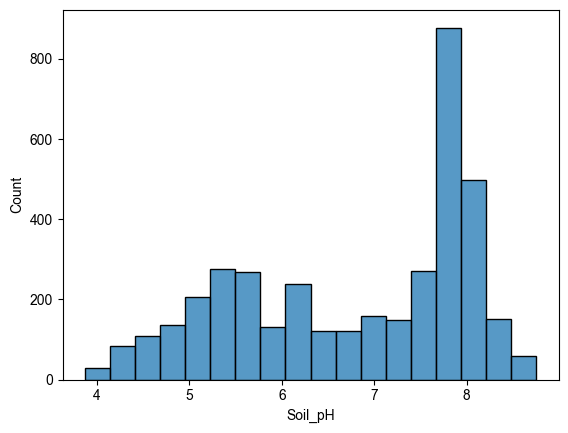

In [121]:
import seaborn as sns 
sns.histplot(metainfo, x='Soil_pH')

<Axes: xlabel='Altitude', ylabel='Count'>

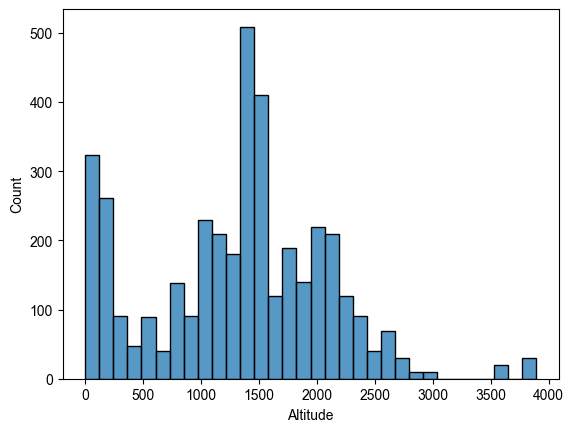

In [122]:
sns.histplot(metainfo, x='Altitude')

<Axes: xlabel='Longitude', ylabel='Count'>

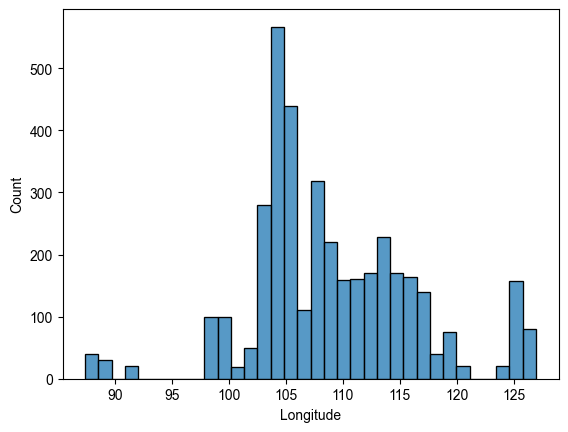

In [123]:
sns.histplot(metainfo, x='Longitude')

<Axes: xlabel='Latitude', ylabel='Count'>

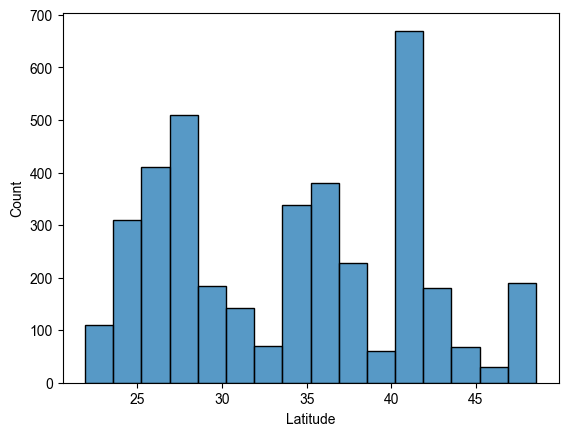

In [124]:
sns.histplot(metainfo, x='Latitude')

<Axes: xlabel='Altitude', ylabel='Count'>

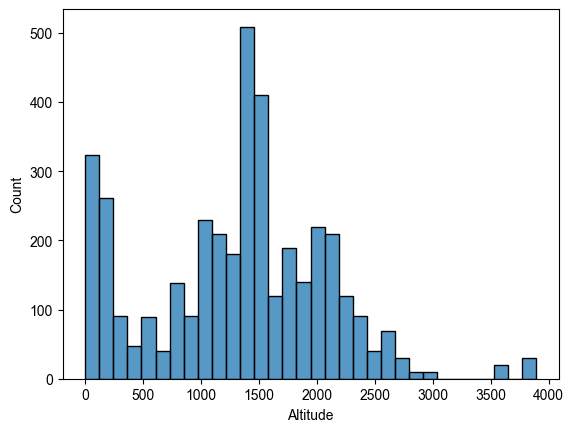

In [125]:
sns.histplot(metainfo, x='Altitude')

<Axes: xlabel='Elevation', ylabel='Count'>

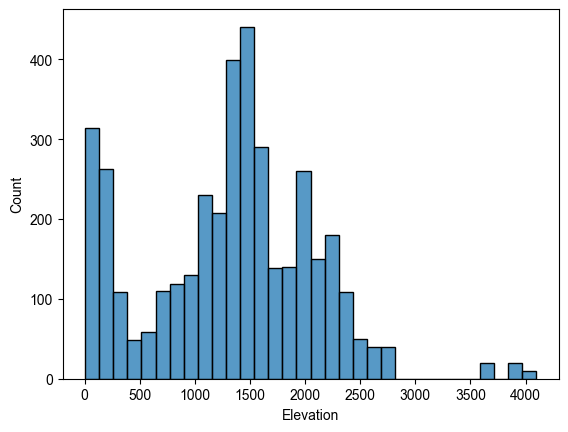

In [126]:
sns.histplot(metainfo, x='Elevation')

<Axes: xlabel='Temperature', ylabel='Count'>

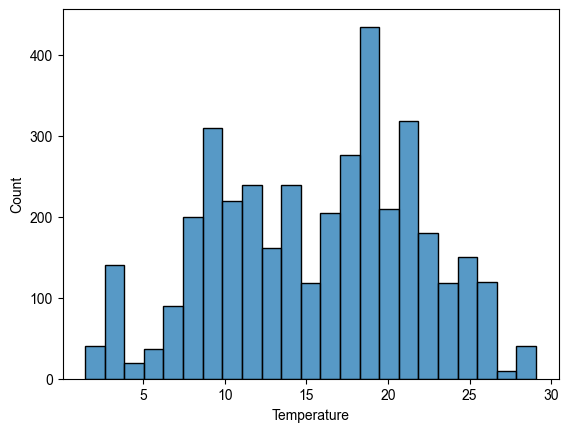

In [127]:
sns.histplot(metainfo, x='Temperature')

<Axes: xlabel='Precipitation', ylabel='Count'>

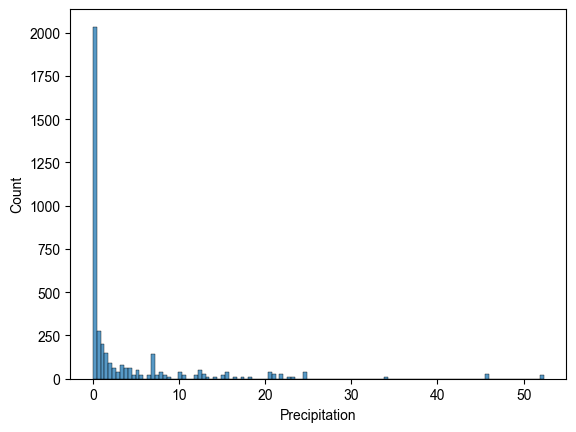

In [128]:
sns.histplot(metainfo, x='Precipitation')

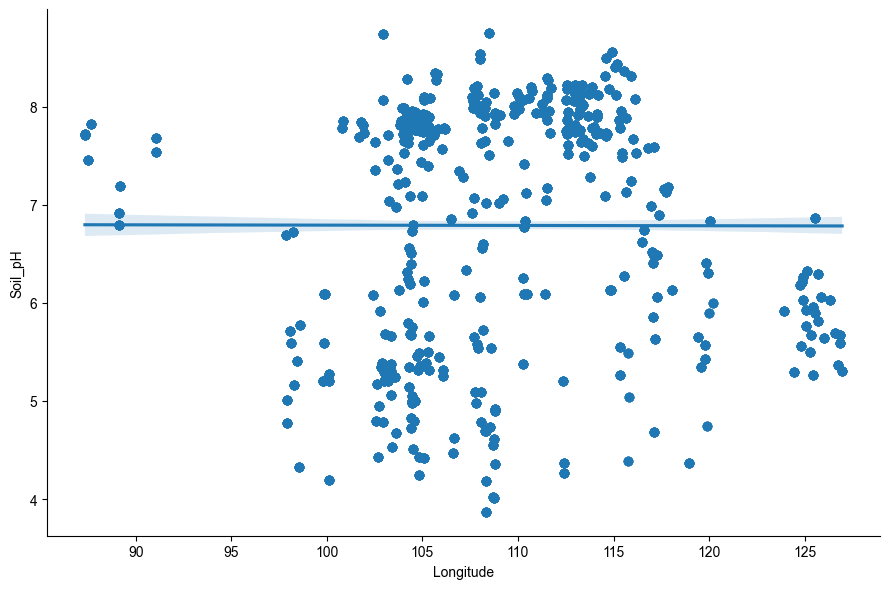

In [79]:
# sns.lmplot(data=metainfo, x="Longitude", y="Soil_pH", height=6, aspect=1.5, alpha=0.5)
sns.lmplot(data=metainfo, x="Longitude", y="Soil_pH", height=6, aspect=1.5)

<Axes: xlabel='Longitude', ylabel='Latitude'>

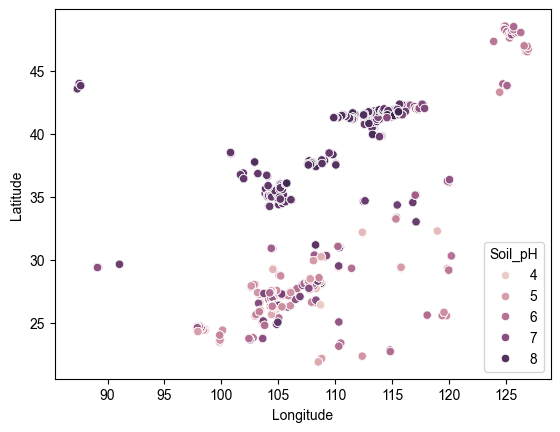

In [80]:
sns.scatterplot(
    data= metainfo, 
    x="Longitude",
    y="Latitude",
    hue= "Soil_pH",
    # cols= "Area"
)

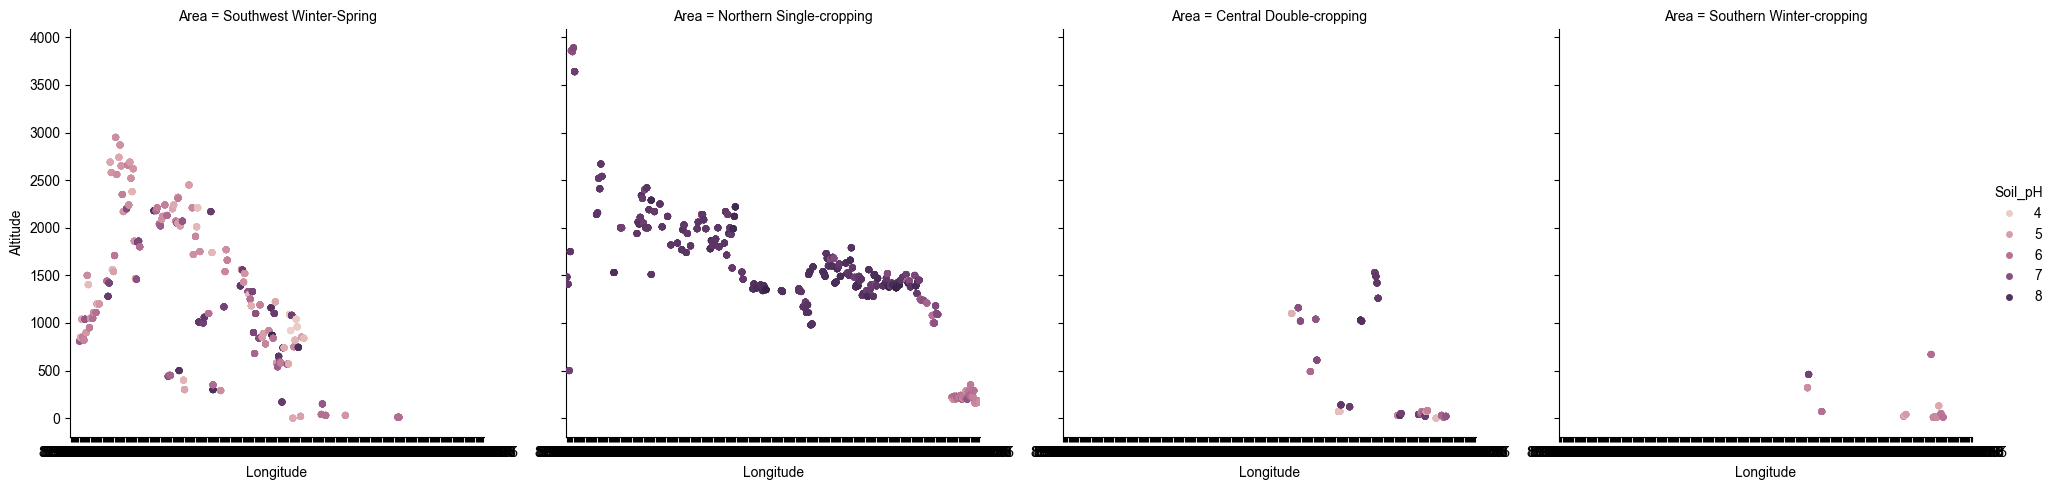

In [81]:
sns.catplot(
    data= metainfo, 
    x="Longitude",
    y="Altitude",
    hue="Soil_pH",
    col= "Area",
)

# 2. <a id='toc2_'></a>[采样地图](#toc0_)

| 形状    | `marker` 值 |
| ----- | ---------- |
| 圆     | `'o'`      |
| 正方形   | `'s'`      |
| 三角形↑  | `'^'`      |
| 三角形↓  | `'v'`      |
| 菱形    | `'D'`      |
| 星形    | `'*'`      |
| 加号    | `'+'`      |
| x 形   | `'x'`      |
| 点（最小） | `'.'`      |


In [82]:
def scatter(ax, metainfo):
    '''
    # ========== 3. 读取采样点经纬度坐标 ==========
    # samples = pd.read_csv('sampling_points.csv')  # CSV 文件需包含 'lon', 'lat' 两列
    '''
    northern = metainfo[metainfo['Area'] == "Northern Single-cropping"]
    Southwest = metainfo[metainfo['Area'] == "Southwest Winter-Spring"]
    Central = metainfo[metainfo['Area'] == "Central Double-cropping"]
    Southern = metainfo[metainfo['Area'] == "Southern Winter-cropping"]
    colors = ['#38C5EB', '#A0EB38', '#CA38EB', '#EB8F38']
    size = 10
    ax.scatter(northern['Longitude'], northern['Latitude'], color= colors[0], s=size, label='Northern', zorder= 3, marker='x')
    ax.scatter(Southwest['Longitude'], Southwest['Latitude'], color= colors[1], s=size, label='Southwest', zorder= 3, marker='^')
    ax.scatter(Central['Longitude'], Central['Latitude'], color= colors[2], s=size, label='Central', zorder= 3, marker='D')
    ax.scatter(Southern['Longitude'], Southern['Latitude'], color= colors[3], s=size, label='Southern', zorder= 3, marker='+')
    return ax

Text(0.5, 1.0, 'China Elevation Map with Sampling Points')

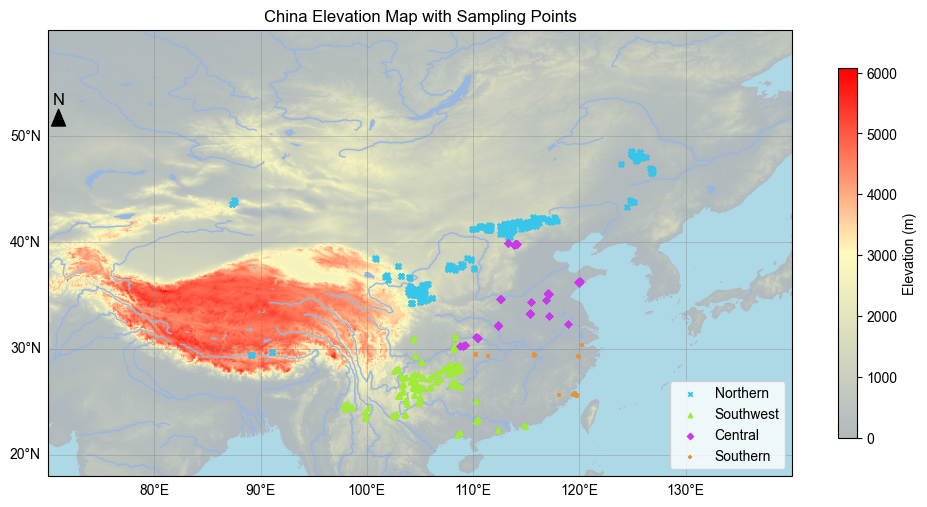

In [83]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.rcParams['svg.fonttype'] = 'none'  # 确保字体类型为 'none'，以避免字体问题
plt.rcParams['font.sans-serif'] = ['Arial']  # 设置默认字体为 Arial Unicode MS
plt.rcParams['font.serif'] = 'Times New Roman'  # 设置衬线字体为 Times New Roman
plt.rcParams['axes.unicode_minus'] = False  # 确保负号正常显示


# ========== 1. 读取全球 BIL 格式高程数据（需与 .hdr 同目录） ==========
bil_path = "datas/World_DEM/world_dem"  # 替换为你的 BIL 文件路径
with rasterio.open(bil_path) as src:
    data = src.read(1)  # 读取高程栅格数据（二维数组）
    data = np.where(data == src.nodata, np.nan, data)  # 用 NaN 替换无效值
    bounds = src.bounds   
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]  # 地图范围（用于imshow）

# ========== 2. 定义中国地理范围 ==========
china_extent = [70, 140, 18, 55]  # 西、东、南、北边界

# ========== 4. 绘图（地形图 + 采样点 + 比例尺 + 北箭头） ==========
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection= ccrs.PlateCarree())  # 使用 PlateCarree 投影

# 绘制地形图（颜色渐变，仿照 terrain 风格）
elev_cmap = LinearSegmentedColormap.from_list("elevation", ['#B0B9BE', '#FFFBBD', 'red',])
norm = Normalize(vmin=0, vmax=np.nanmax(data))  # 归一化处理
img = ax.imshow(data, extent=extent, cmap= elev_cmap, norm= norm, origin= 'upper', zorder= 0)

ax.set_extent(china_extent)  # 聚焦中国范围

# 添加国家边界和海岸线
# ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5)
# ax.coastlines(resolution='10m', linewidth=0.5)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder= 0)

# 添加经纬网格线
gl = ax.gridlines(draw_labels= True, linewidth= 0.5, color= 'gray', alpha= 0.5)
gl.top_labels = gl.right_labels = False  # 不显示顶部和右侧标签

# 添加采样点（统一蓝色圆点）
# ax.scatter(samples['Longitude'], samples['Latitude'], color= '#0757EC', s=5, label='Sampling points', zorder= 3)
scatter(ax= ax, metainfo= metainfo)

# 添加图例
plt.legend(loc='lower right')

# 添加色带（高程值）
cbar = plt.colorbar(img, ax= ax, shrink= 0.6, orientation= 'vertical', label= 'Elevation (m)')

# 添加简单北箭头
ax.text(71, 53, 'N', fontsize=12, ha='center')
ax.annotate('', xy=(71, 52.5), xytext=(71, 51.5), arrowprops=dict(facecolor='black', width=2, headwidth=10), xycoords='data')

# 添加标题
plt.title("China Elevation Map with Sampling Points")
# plt.tight_layout()

# 保存为 SVG 格式
# plt.savefig("map.svg", format= "svg")

# 3. <a id='toc3_'></a>[Diversity analysis](#toc0_)

## beta

In [84]:
zotu = pd.read_table("results/feature_table/zotutab_6k.txt")

In [85]:
zotu.head()

,#OTU ID,F146a,F146b,F146c,F146d,F146e,F147a,F147b,F147c,F147d,...,G99a,G99b,G99c,G99d,G99e,G9a,G9b,G9c,G9d,G9e
0,Zotu34128,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Zotu3,39,31,32,33,46,2,2,3,4,...,0,0,0,0,0,1,1,0,0,0
2,Zotu155,4,5,1,4,4,1,4,3,6,...,0,0,0,0,0,4,1,4,1,0
3,Zotu70143,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Zotu178,20,10,18,15,13,18,13,21,16,...,2,3,1,2,2,0,0,0,0,0


## alpha

In [131]:
import pandas as pd 
import matplotlib.pylab as plt 

In [132]:
alphas = pd.read_table("results/diversity/alpha/zotutab_6k_alpha.txt")
alphas.rename(columns= {"Sample": "SampleID"}, inplace= True)
alphas.shape

(3233, 23)

In [133]:
alphas.head(10)

,SampleID,berger_parker,buzas_gibson,chao1,dominance,equitability,jost,jost1,reads,richness,...,shannon_e,shannon_2,shannon_10,flyvbjerg,mirror,mirrorns,logfit,logfitns,logfitmu,logfitmuns
0,F146a,0.0170,0.240,7050.4,0.998,0.921,870.9,1437.5,6000.0,2693.0,...,7.27,10.5,3.16,1711.8,3571.0,1188.0,2730.0,2620.0,-1.0,-0.3
1,F146b,0.0142,0.257,6561.2,0.998,0.928,1011.2,1544.2,6000.0,2724.0,...,7.34,10.6,3.19,2324.0,3642.0,1250.0,2717.0,2607.0,-1.0,-0.3
2,F146c,0.0175,0.247,7069.3,0.998,0.923,921.2,1479.8,6000.0,2726.0,...,7.30,10.5,3.17,1825.3,3602.0,1172.0,2783.0,2669.0,-1.0,-0.3
3,F146d,0.0120,0.273,7046.2,0.999,0.930,1061.3,1639.0,6000.0,2867.0,...,7.40,10.7,3.21,2335.7,3786.0,1205.0,2930.0,2812.0,-1.0,-0.3
4,F146e,0.0200,0.242,6713.7,0.998,0.920,865.7,1453.4,6000.0,2734.0,...,7.28,10.5,3.16,2444.4,3618.0,1185.0,2783.0,2669.0,-1.0,-0.3
5,F147a,0.0340,0.236,5793.3,0.998,0.920,791.7,1416.5,6000.0,2671.0,...,7.26,10.5,3.15,2506.9,3627.0,1262.0,2579.0,2579.0,-1.0,-1.0
6,F147b,0.0393,0.226,6385.9,0.997,0.914,717.1,1357.1,6000.0,2666.0,...,7.21,10.4,3.13,2256.9,3558.0,1198.0,2669.0,2560.0,-1.0,-0.3
7,F147c,0.0443,0.229,6894.8,0.997,0.913,678.0,1374.4,6000.0,2739.0,...,7.23,10.4,3.14,1892.1,3632.0,1184.0,2776.0,2664.0,-1.0,-0.3
8,F147d,0.0455,0.218,6065.1,0.996,0.910,638.9,1307.7,6000.0,2652.0,...,7.18,10.4,3.12,2209.9,3567.0,1206.0,2613.0,2613.0,-1.0,-1.0
9,F147e,0.0470,0.216,5992.8,0.996,0.910,634.8,1295.5,6000.0,2624.0,...,7.17,10.3,3.11,2133.0,3538.0,1210.0,2571.0,2571.0,-1.0,-1.0


In [134]:
alphas.columns

Index(['SampleID', 'berger_parker', 'buzas_gibson', 'chao1', 'dominance',
       'equitability', 'jost', 'jost1', 'reads', 'richness', 'richness2',
       'robbins', 'simpson', 'shannon_e', 'shannon_2', 'shannon_10',
       'flyvbjerg', 'mirror', 'mirrorns', 'logfit', 'logfitns', 'logfitmu',
       'logfitmuns'],
      dtype='object')

In [135]:
metainfo.shape

(3916, 48)

In [136]:
metainfo.head()

,SampleID,Group,Code,Part,Area,Loacation,City,Longitude,Latitude,Altitude,...,Disease,早疫病,晚疫病,疮痂病,黑痣病,粉痂病,青枯病,黑胫病,枯萎病,病毒病
0,G1a,G1,1,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,早疫病,3,0,0,0,0,0,0,0,0
1,G1b,G1,1,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,早疫病,3,0,0,0,0,0,0,0,0
2,G1c,G1,1,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,早疫病,3,0,0,0,0,0,0,0,0
3,G1d,G1,1,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,早疫病,3,0,0,0,0,0,0,0,0
4,G1e,G1,1,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,早疫病,3,0,0,0,0,0,0,0,0


In [137]:
# Screening matainfo accordding to alphas (efficient smaples)
metainfo_diversity = metainfo[metainfo['SampleID'].isin(alphas["SampleID"])]

In [138]:
metainfo_diversity.shape

(3233, 48)

In [139]:
metainfo_diversity = pd.merge(left= metainfo_diversity, right= alphas, on= "SampleID")

In [140]:
metainfo_diversity.head(10)

,SampleID,Group,Code,Part,Area,Loacation,City,Longitude,Latitude,Altitude,...,shannon_e,shannon_2,shannon_10,flyvbjerg,mirror,mirrorns,logfit,logfitns,logfitmu,logfitmuns
0,G1a,G1,1,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,7.16,10.3,3.11,1711.4,3446.0,1052.0,2879.0,2708.0,-1.0,-0.4
1,G1b,G1,1,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,7.04,10.2,3.06,2444.6,3276.0,1098.0,2512.0,2410.0,-1.0,-0.3
2,G1c,G1,1,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,7.09,10.2,3.08,2111.9,3379.0,1054.0,2754.0,2591.0,-1.0,-0.4
3,G1d,G1,1,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,7.16,10.3,3.11,1948.9,3481.0,1079.0,2802.0,2689.0,-1.0,-0.3
4,G1e,G1,1,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,7.15,10.3,3.11,2010.2,3500.0,1075.0,2825.0,2710.0,-1.0,-0.3
5,G2b,G2,2,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,7.00,10.1,3.04,1950.8,3280.0,1058.0,2556.0,2453.0,-1.0,-0.3
6,G2c,G2,2,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,7.03,10.1,3.05,1746.0,3325.0,1032.0,2718.0,2556.0,-1.0,-0.4
7,G2d,G2,2,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,7.21,10.4,3.13,2300.4,3551.0,1118.0,2837.0,2723.0,-1.0,-0.3
8,G2e,G2,2,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.805835,23.475918,1050,...,7.06,10.2,3.06,2008.0,3348.0,1043.0,2729.0,2567.0,-1.0,-0.4
9,G3a,G3,3,Rhizosphere,Southwest Winter-Spring,Yunnan,Lincang,99.806230,23.464656,1050,...,6.96,10.0,3.02,1843.1,3280.0,1069.0,2544.0,2442.0,-1.0,-0.3


In [141]:
# metainfo_diversity[["SampleID", "Group", "Part", "Area", "Longitude", "Latitude", "Altitude", "richness"]].groupby("Group").mean(numeric_only=True)

# mean所有的技术重复 (a, b, ...)
metainfo_diversity = metainfo_diversity.groupby("Group").agg(
    lambda x: x.mean() if pd.api.types.is_numeric_dtype(x) else x.unique()[0]
).reset_index()

## 3.1. <a id='toc3_1_'></a>[check](#toc0_)

<Axes: xlabel='shannon_10', ylabel='Count'>

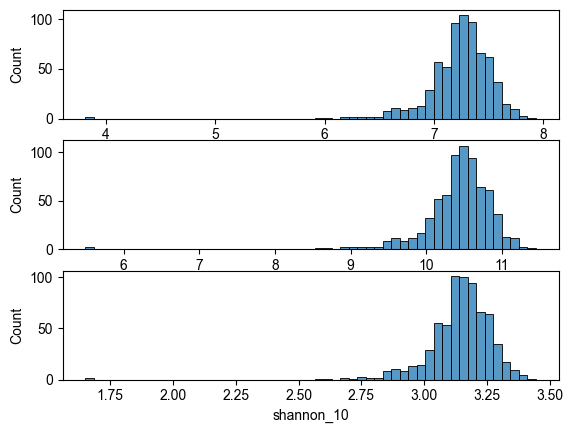

In [142]:
plt.subplot(3,1,1)
sns.histplot(data= metainfo_diversity['shannon_e'])
plt.subplot(3,1,2)
sns.histplot(data= metainfo_diversity['shannon_2'])
plt.subplot(3,1,3)
sns.histplot(data= metainfo_diversity['shannon_10'])

## 3.2. <a id='toc3_2_'></a>[Part](#toc0_)

<Axes: xlabel='Part', ylabel='chao1'>

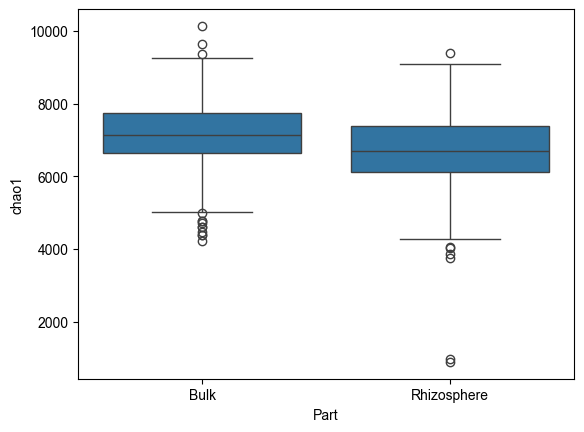

In [143]:
sns.boxplot(data= metainfo_diversity, x= "Part", y= "chao1")
# sns.boxplot(data= metainfo_diversity, x= "Part", y= "richness")

## 3.3. <a id='toc3_3_'></a>[Area](#toc0_)

<Axes: xlabel='Area', ylabel='richness'>

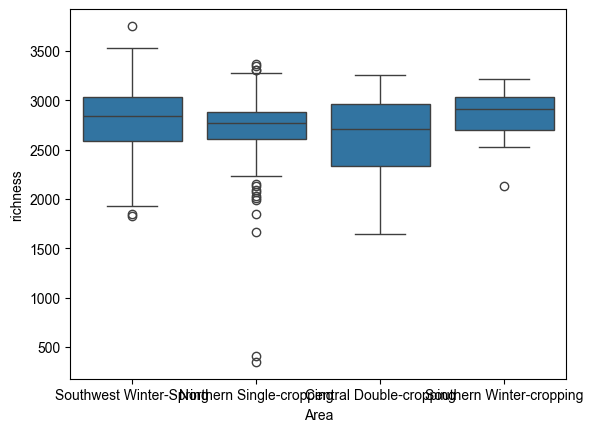

In [144]:
sns.boxplot(data= metainfo_diversity, x= "Area", y= "richness")

## 3.4. <a id='toc3_4_'></a>[Longitude](#toc0_)

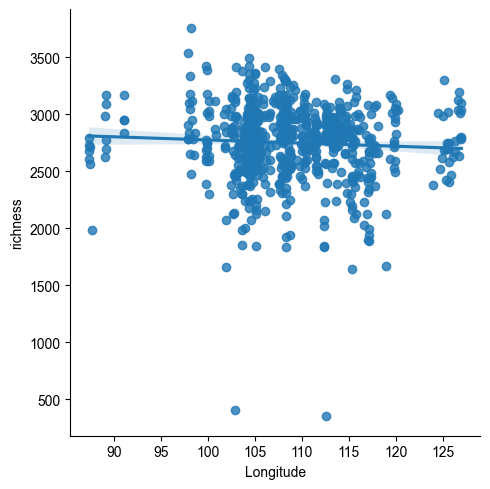

In [145]:
sns.lmplot(data= metainfo_diversity, x= "Longitude", y= "richness")

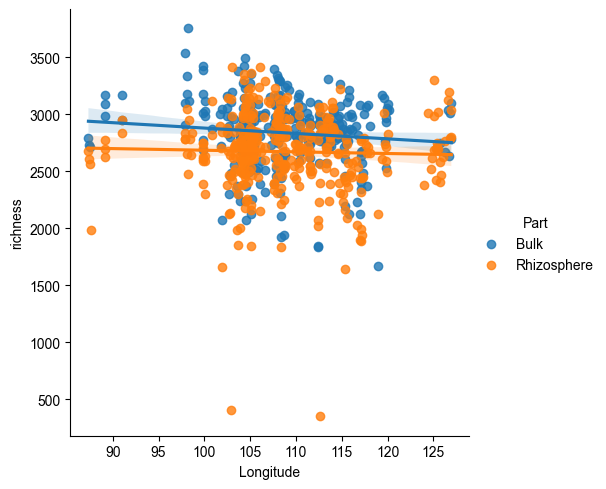

In [146]:
sns.lmplot(data= metainfo_diversity, x= "Longitude", y= "richness", hue= "Part")

## 3.5. <a id='toc3_5_'></a>[Latitude](#toc0_)

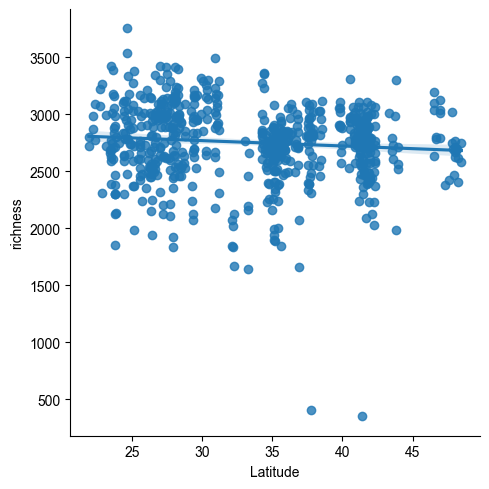

In [147]:
sns.lmplot(data= metainfo_diversity, x= "Latitude", y= "richness")

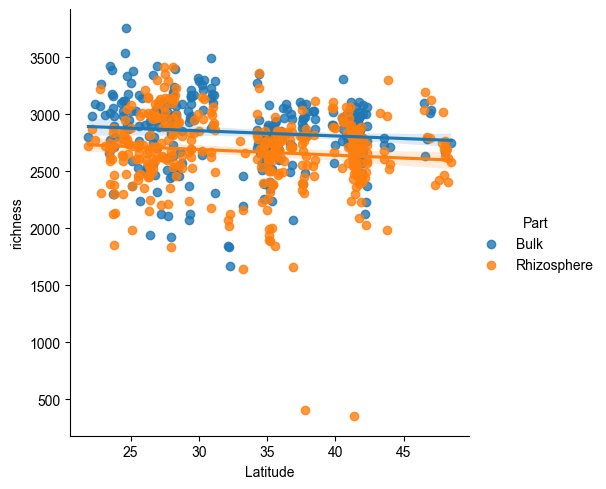

In [148]:
sns.lmplot(data= metainfo_diversity, x= "Latitude", y= "richness", hue= "Part")

## 3.6. <a id='toc3_6_'></a>[Altitude](#toc0_)

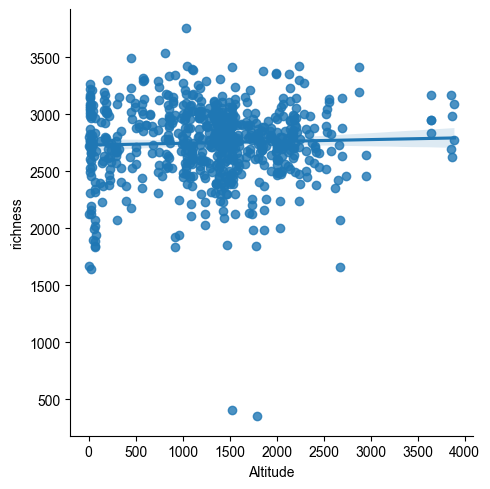

In [149]:
sns.lmplot(data= metainfo_diversity, x= "Altitude", y= "richness")

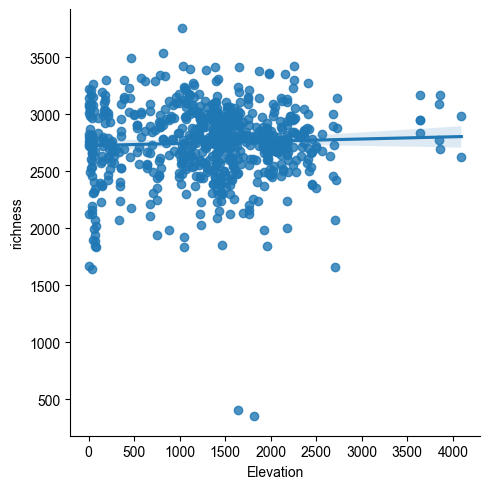

In [168]:
sns.lmplot(data= metainfo_diversity, x= "Elevation", y= "richness")

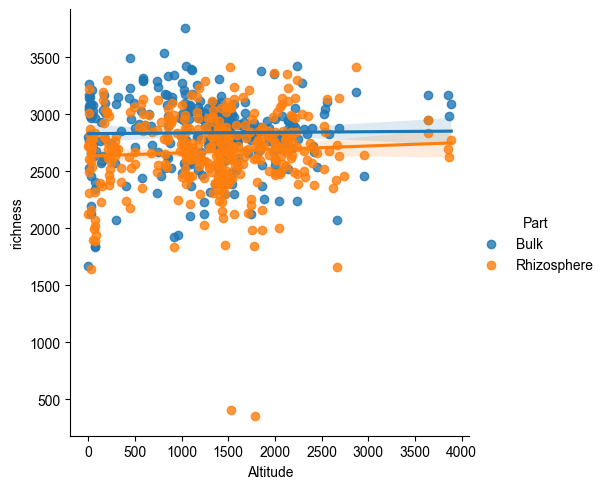

In [152]:
sns.lmplot(data= metainfo_diversity, x= "Altitude", y= "richness", hue= "Part")

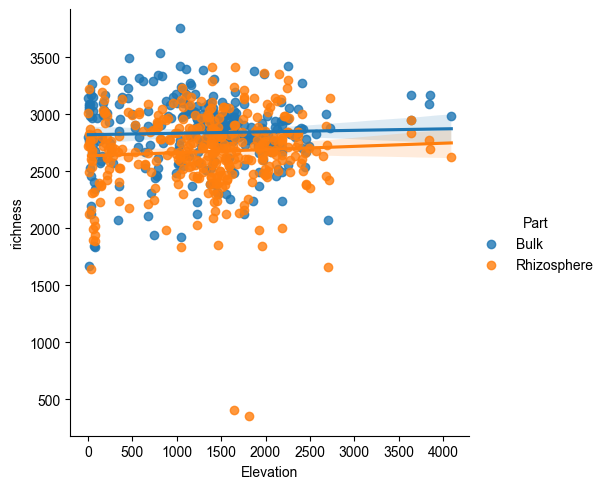

In [169]:
sns.lmplot(data= metainfo_diversity, x= "Elevation", y= "richness", hue= "Part")

## Temperature

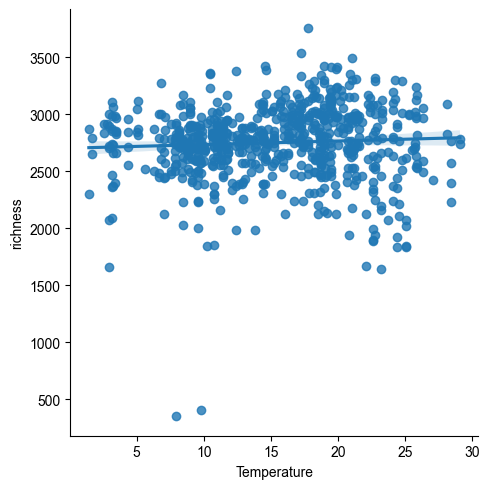

In [170]:
sns.lmplot(data= metainfo_diversity, x= "Temperature", y= "richness")

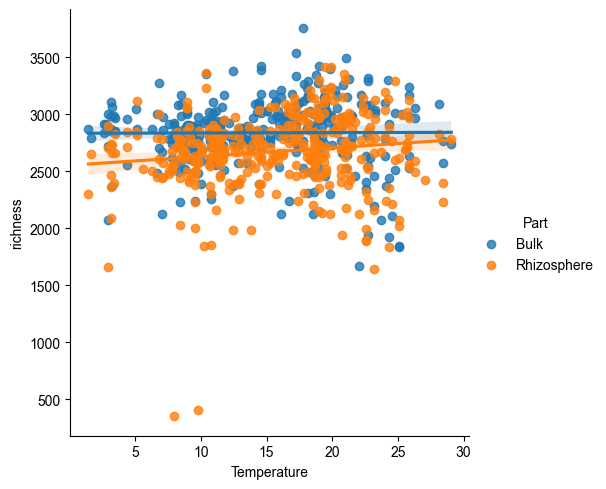

In [171]:
sns.lmplot(data= metainfo_diversity, x= "Temperature", y= "richness", hue= "Part")

## Precipitation

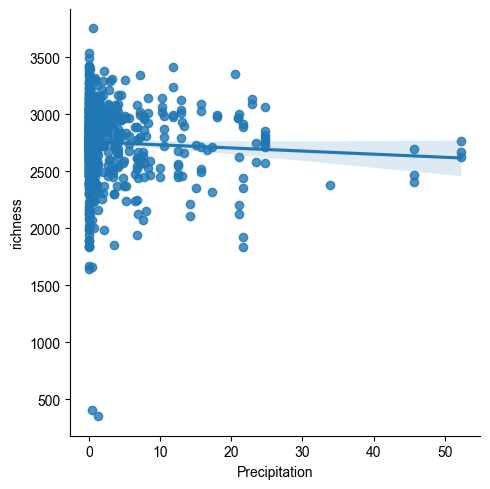

In [ ]:
sns.lmplot(data= metainfo_diversity, x= "Precipitation", y= "richness")

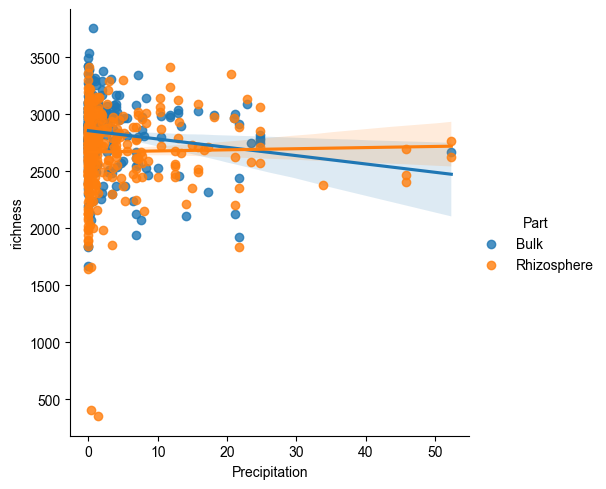

In [173]:
sns.lmplot(data= metainfo_diversity, x= "Precipitation", y= "richness", hue= "Part")

## 3.7. <a id='toc3_7_'></a>[Soil](#toc0_)

<Axes: xlabel='Soil', ylabel='richness'>

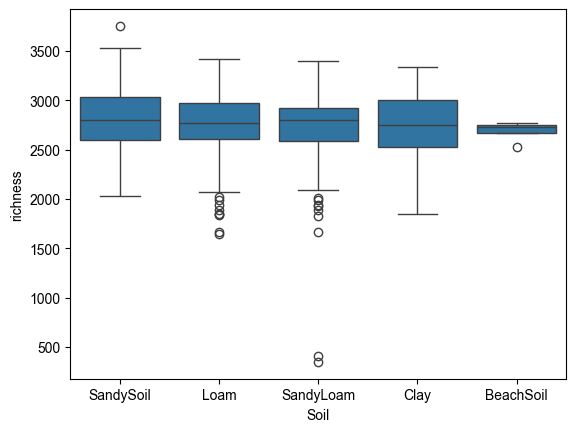

In [153]:
sns.boxplot(data= metainfo_diversity, x= "Soil", y= "richness")

<Axes: xlabel='Soil', ylabel='richness'>

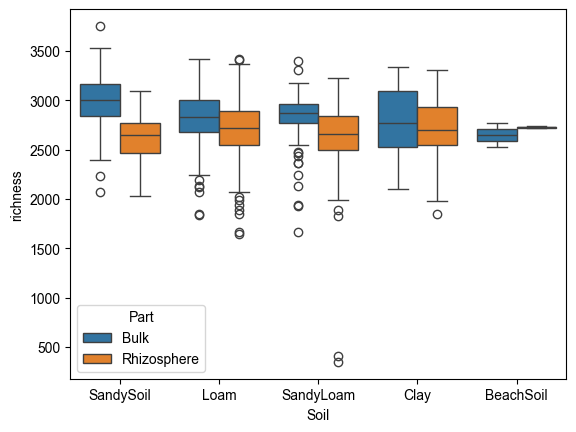

In [154]:
sns.boxplot(data= metainfo_diversity, x= "Soil", y= "richness", hue= "Part")

## 3.8. <a id='toc3_8_'></a>[Soil pH](#toc0_)

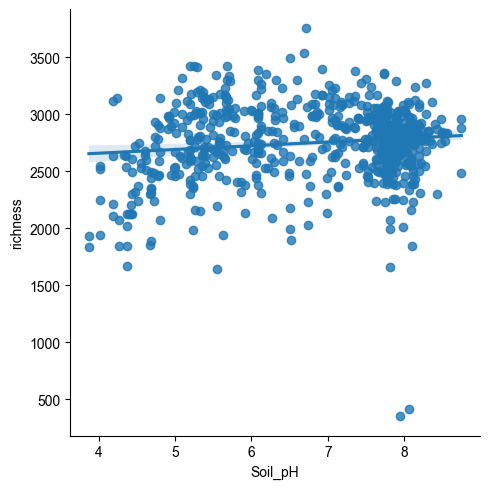

In [155]:
sns.lmplot(data= metainfo_diversity, x= "Soil_pH", y= "richness")

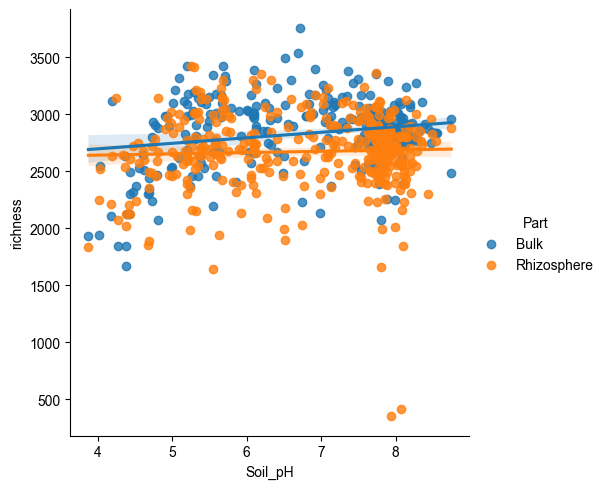

In [156]:
sns.lmplot(data= metainfo_diversity, x= "Soil_pH", y= "richness", hue= "Part")

## 3.9. <a id='toc3_9_'></a>[Breeding](#toc0_)

<Axes: xlabel='Breeding', ylabel='richness'>

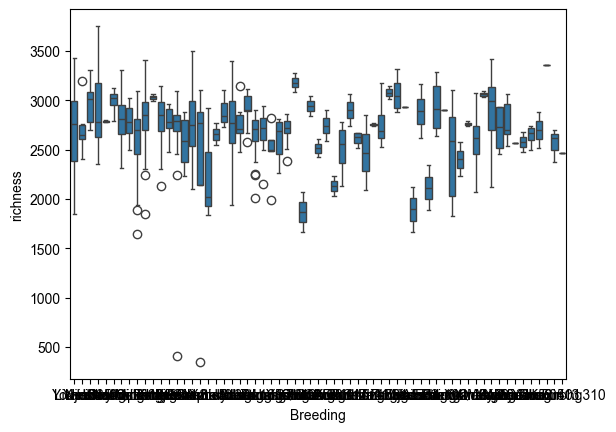

In [157]:
sns.boxplot(data= metainfo_diversity, x= "Breeding", y= "richness")

<Axes: xlabel='Breeding', ylabel='richness'>

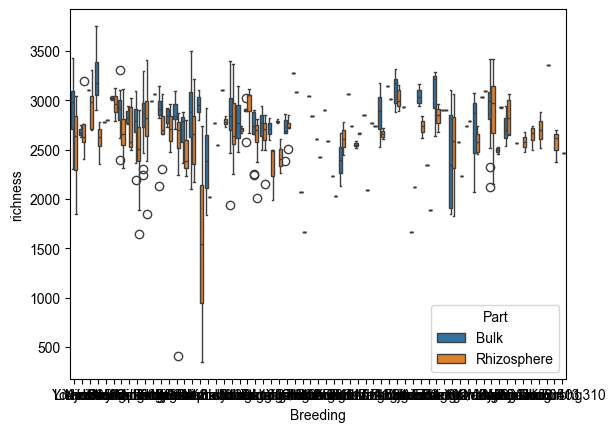

In [158]:
sns.boxplot(data= metainfo_diversity, x= "Breeding", y= "richness", hue= "Part")

## 3.10. <a id='toc3_10_'></a>[Previous crop](#toc0_)

<Axes: xlabel='PreviousCrop', ylabel='richness'>

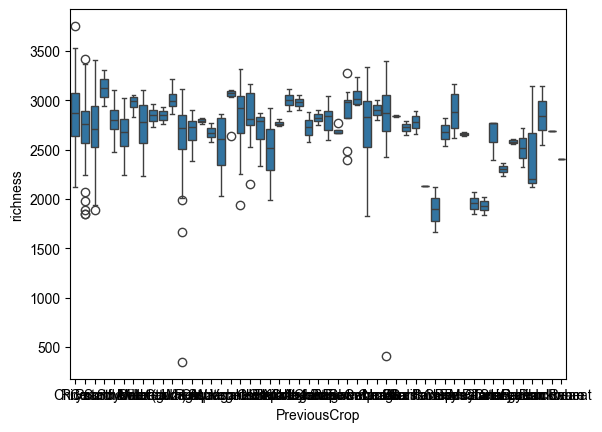

In [159]:
sns.boxplot(data= metainfo_diversity, x= "PreviousCrop", y= "richness")

<Axes: xlabel='PreviousCrop', ylabel='richness'>

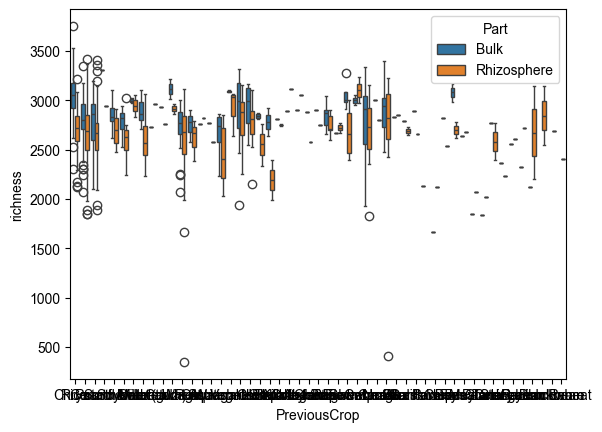

In [160]:
sns.boxplot(data= metainfo_diversity, x= "PreviousCrop", y= "richness", hue= "Part")

## 3.11. <a id='toc3_11_'></a>[Mode](#toc0_)

<Axes: xlabel='Mode', ylabel='richness'>

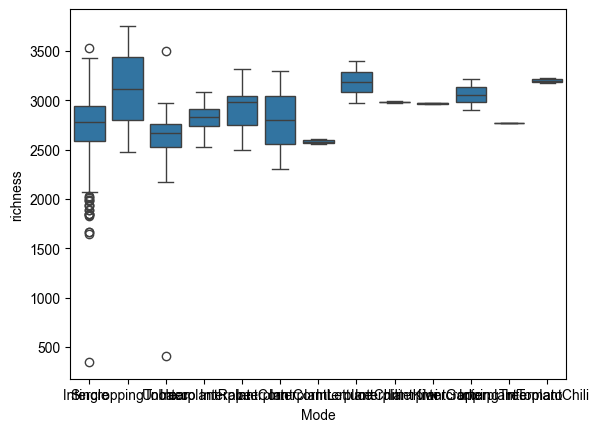

In [161]:
sns.boxplot(data= metainfo_diversity, x= "Mode", y= "richness")

<Axes: xlabel='Mode', ylabel='richness'>

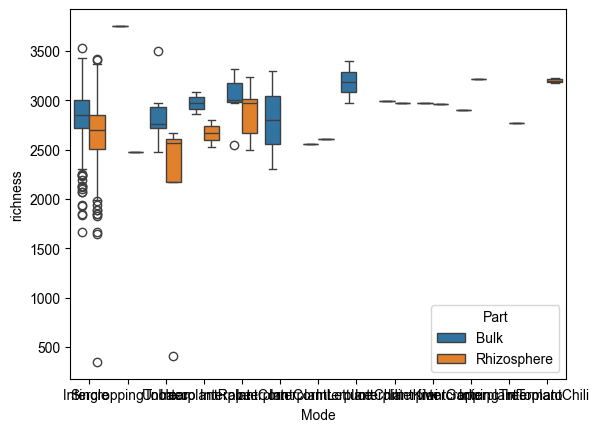

In [162]:
sns.boxplot(data= metainfo_diversity, x= "Mode", y= "richness", hue= "Part")

## 3.12. <a id='toc3_12_'></a>[Early blight](#toc0_)

<Axes: xlabel='EarlyBlight', ylabel='richness'>

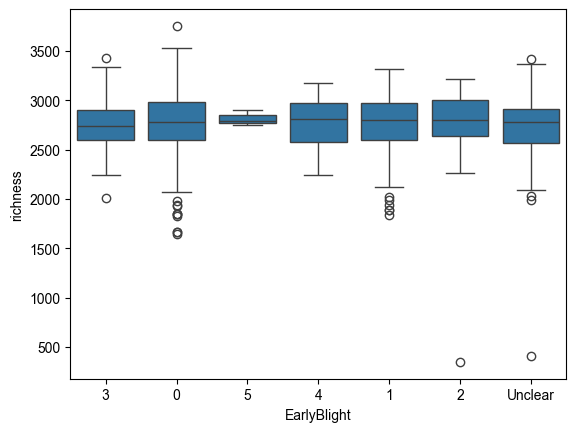

In [163]:
sns.boxplot(data= metainfo_diversity, x= "EarlyBlight", y= "richness")

<Axes: xlabel='Batch', ylabel='richness'>

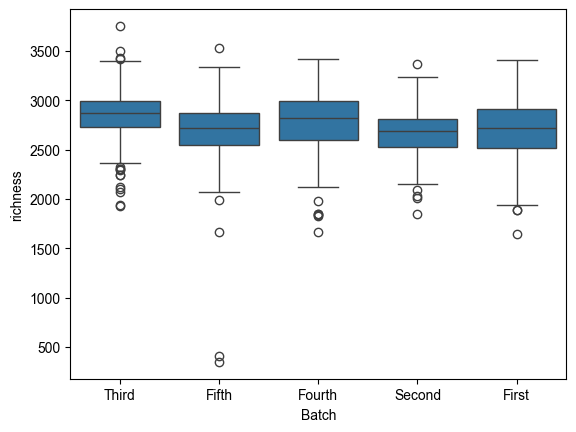

In [164]:
sns.boxplot(data= metainfo_diversity, x= "Batch", y= "richness")

# 4. <a id='toc4_'></a>[多因素影响分析](#toc0_)

## 4.1. <a id='toc4_1_'></a>[OLS](#toc0_)

多重 OLS 回归（Multiple Ordinary Least Squares Regression）：
- 作用：探索多个环境因子对细菌多样性指标（如 Shannon 指数）的线性解释能力。
- 输入：X（多个因子），Y（多样性值）
- 优点：结果直观，R² 表示解释度；可计算每个变量的显著性（p 值）

🔍 结果解读：
- coef：变量回归系数
- p-value：显著性
- R²：模型解释力

In [165]:
import statsmodels.api as sm 


X = metainfo_diversity[["Longitude", "Latitude", "Altitude", "Soil_pH"]]
y = metainfo_diversity[["richness"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               richness   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     11.00
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           1.18e-08
Time:                        19:30:55   Log-Likelihood:                -4993.7
No. Observations:                 695   AIC:                             9997.
Df Residuals:                     690   BIC:                         1.002e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2034.7679    308.932      6.586      0.0

## 4.2. <a id='toc4_2_'></a>[CCA/RDA](#toc0_)

冗余分析（RDA, Redundancy Analysis）
- 作用：用于解释群落结构与环境因子之间的线性关系
- 本质：PCA + 多元线性回归
- 输入：群落矩阵（如 OTU 表）与环境矩阵（如 pH、TOC）
- 输出：群落结构中被解释的变异比例（R²、调整后的 R²）

In [166]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


# 标准化 OTU 表和环境因子
otu_std = (otu_data - otu_data.mean()) / otu_data.std()
env_std = (env_data - env_data.mean()) / env_data.std()

# 线性拟合 OTU ← env
rda_model = LinearRegression().fit(env_std, otu_std)
fitted = rda_model.predict(env_std)

# PCA on fitted OTU matrix
pca = PCA(n_components=2)
rda_scores = pca.fit_transform(fitted)


NameError: name 'otu_data' is not defined

In [ ]:
from sklearn.cross_decomposition import CCA


cca = CCA(n_components= 1)
cca.fit(metainfo_diversity[["Longitude", "Latitude", "Altitude", "Soil_pH"]], metainfo_diversity["richness"])

,n_components,1
,scale,True
,max_iter,500
,tol,1e-06
,copy,True


## 4.3. <a id='toc4_3_'></a>[Sliding Window + Hierarchical Partitioning](#toc0_)

移动窗口结合层级划分法（Sliding Window + Hierarchical Partitioning）
- 滑动窗口：沿时间或空间（如纬度）滑动，局部分析因子贡献
- 层级划分法：计算每个变量的独立解释量 vs 与其他变量的交互解释量
- 目的：分析在不同空间/时间段中，不同因子作用是否稳定

## 4.4. <a id='toc4_4_'></a>[Random Forest/XGBoost](#toc0_)

随机森林（Random Forest）
- 作用：评估各环境因子对微生物多样性或群落结构的非线性影响
- 优势：处理多变量、变量间共线性强、无需变量分布假设
- 结果：提供每个变量的重要性得分（feature importance）

In [ ]:
from sklearn.ensemble import RandomForestRegressor 


rf = RandomForestRegressor(n_estimators= 500)
rf.fit(metainfo_diversity[["Longitude", "Latitude", "Altitude", "Soil_pH"]], metainfo_diversity[["richness"]])


/bmp/backup/zhaosy/miniconda3/envs/microbiome/lib/python3.13/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': ["Longitude", "Latitude", "Altitude", "Soil_pH"],
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df

,Feature,Importance
3,Soil_pH,0.338315
1,Latitude,0.282963
2,Altitude,0.199107
0,Longitude,0.179615


## 4.5. <a id='toc4_5_'></a>[PLS-PM / PLS-SEM](#toc0_)

偏最小二乘路径建模（PLS-PM / PLS-SEM）
- 作用：建构环境→中介变量→微生物结构的路径因果模型
- 输入：多个变量块（如环境、生物、群落结构），构建结构路径图
- 适用性：变量间有中介作用、或推测因果路径时非常有用

>Python 中 pyPLS 或使用 smartPLS 软件，R 中 plspm 包常用。

In [ ]:
from sklearn.cross_decomposition import PLSRegression 


pls = PLSRegression(n_components=2)
pls.fit(metainfo_diversity[["Longitude", "Latitude", "Altitude", "Soil_pH"]], metainfo_diversity[["richness", "shannon_e"]])

,n_components,2
,scale,True
,max_iter,500
,tol,1e-06
,copy,True


In [ ]:
print(pls.coef_)

[[ 1.69374338e+00 -1.18841454e+01 -1.72048624e-02  7.58973343e+01]
 [ 1.89765612e-04 -6.13984856e-03 -4.14763960e-06  3.76036791e-02]]


🔄 各方法比较与组合建议

| 方法        | 是否解释群落结构 | 是否解释多样性 | 是否考虑非线性 | 可解释路径机制 |
| --------- | -------- | ------- | ------- | ------- |
| OLS       | ❌        | ✅       | ❌       | ❌       |
| RDA       | ✅        | ❌       | ❌       | ❌       |
| 层级划分 + 滑窗 | ✅        | ✅       | ❌       | ❌       |
| 随机森林      | ✅        | ✅       | ✅       | ❌       |
| PLS-PM    | ✅        | ✅       | ✅       | ✅       |

📌 小结：推荐组合策略
- 多样性指标（如 Shannon） → 用 OLS + RF
- 群落结构变异（OTU 表） → 用 RDA + 滑动窗口
- 整体变量贡献解释 → 用 层级划分法
- 探讨路径和机制（如 pH→微生物网络→Shannon） → 用 PLS-PM

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
df = pd.DataFrame({
    'pH': np.random.normal(6.5, 0.2, 100),
    'TOC': np.random.normal(2.5, 0.5, 100),
    'TN': np.random.normal(0.3, 0.05, 100),
    'shannon1': np.random.normal(4.2, 0.3, 100),
    'shannon2': np.random.normal(4.3, 0.3, 100),
    'bray': np.random.normal(0.5, 0.1, 100),
    'jaccard': np.random.normal(0.6, 0.1, 100)
})

df

,pH,TOC,TN,shannon1,shannon2,bray,jaccard
0,6.599343,1.792315,0.317889,3.951301,3.821672,0.592618,0.675699
1,6.472347,2.289677,0.328039,4.031946,4.120187,0.690942,0.507783
2,6.629538,2.328643,0.354153,4.424188,4.301573,0.360143,0.686961
3,6.804606,2.098861,0.352690,4.383111,4.314094,0.556297,0.735564
4,6.453169,2.419357,0.231117,4.193730,4.164980,0.434936,0.641343
...,...,...,...,...,...,...,...
95,6.207297,2.692659,0.265355,4.059247,4.461673,0.448998,0.569045
96,6.559224,2.058071,0.344980,3.686060,3.988826,0.473013,0.632613
97,6.552211,2.576863,0.315365,4.606162,4.242898,0.402124,0.474889
98,6.501023,2.529104,0.340643,4.165638,4.037315,0.455571,0.692403


In [ ]:
from semopy import Model

desc = """
# 结构模型
Community ~ Environment
Diversity ~ Community

# 测量模型
Environment =~ Longitude + Latitude + Altitude + Soil_pH
Community =~ bray + jaccard
Diversity =~ shannon1 + shannon2
"""
model = Model(desc)
model.fit(df)
# 路径系数
# print(model.inspect(std_est=True))
model.inspect(std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,Community,~,Environment,-1.627355e-01,-2.221270e-01,0.202838,-0.802292,0.422384
1,Diversity,~,Community,2.099362e-01,9.999999e-01,0.890876,0.235651,0.813703
2,pH,~,Environment,1.000000e+00,6.940482e-01,-,-,-
3,TOC,~,Environment,-5.751884e-01,-1.521026e-01,0.800562,-0.71848,0.472461
4,TN,~,Environment,1.269603e-01,2.952544e-01,0.154791,0.820202,0.412101
5,bray,~,Community,1.000000e+00,1.000000e+00,-,-,-
6,jaccard,~,Community,-9.639243e-02,-8.343252e-02,0.404078,-0.238549,0.811455
7,shannon1,~,Diversity,1.000000e+00,7.309972e-02,-,-,-
8,shannon2,~,Diversity,-1.458940e+00,-8.866792e-02,2.578385,-0.565835,0.571506
9,Community,~~,Community,8.029725e-03,9.506596e-01,0.033963,0.236424,0.813104


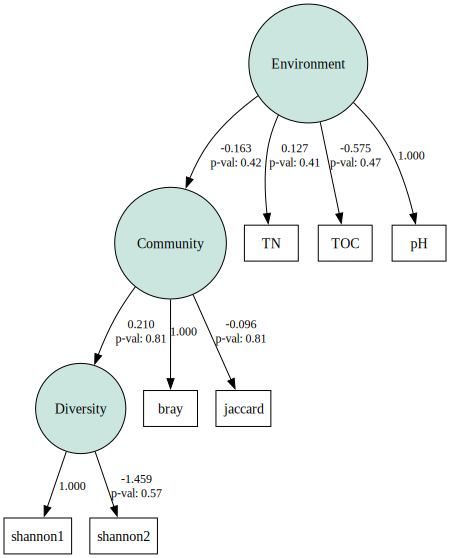

In [ ]:
# # 可视化结构图
# from semopy import plot_model
# plot_model(model, show=True)

import semopy 
semopy.semplot(model, "caches/semopy.png")

# 